In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Text(-3.7,3,'$This\\ is\\ the\\ some\\ text. \\mu\\ \\sigma_i\\ \\alpha_t$')

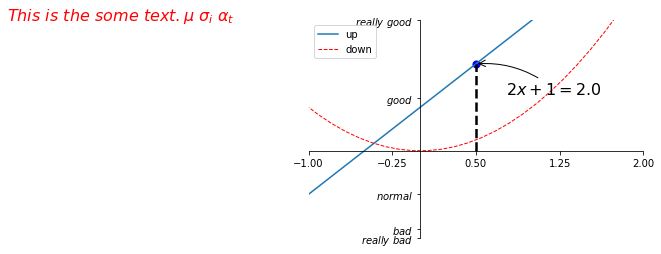

In [11]:
# basics

x = np.linspace(-3, 3, 50)
y1 = 2*x + 1
y2 = x**2

plt.figure()
# set line syles
l1, = plt.plot(x, y1, label='linear line')
l2, = plt.plot(x, y2, color='red', linewidth=1.0, linestyle='--', label='square line')

#set x limits
plt.xlim((-1, 2))
plt.ylim((-2, 3))

# set new sticks
new_sticks = np.linspace(-1, 2, 5)
plt.xticks(new_sticks)
# set tick labels
plt.yticks([-2, -1.8, -1, 1.22, 3], 
           [r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$really\ good$'])

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# plt.legend(loc='upper right')

plt.legend(handles=[l1, l2], labels=['up', 'down'],  loc='best')

# annotation dots
x0 = 0.5
y0 = 2*x0 + 1
plt.plot([x0, x0,], [0, y0,], 'k--', linewidth=2.5)
# set dot styles
plt.scatter([x0, ], [y0, ], s=50, color='b')

plt.annotate(r'$2x+1=%s$' % y0, xy=(x0, y0), xycoords='data', xytext=(+30, -30),
             textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"))

# annotation text
plt.text(-3.7, 3, r'$This\ is\ the\ some\ text. \mu\ \sigma_i\ \alpha_t$',
         fontdict={'size': 16, 'color': 'r'})

([], <a list of 0 Text yticklabel objects>)

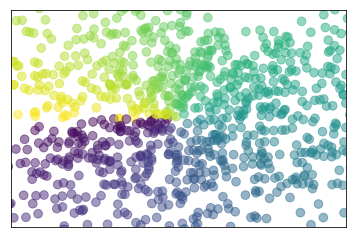

In [13]:
# scatterplot

n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value

plt.scatter(X, Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5, 1.5)
plt.xticks(())  # ignore xticks
plt.ylim(-1.5, 1.5)
plt.yticks(())  # ignore yticks



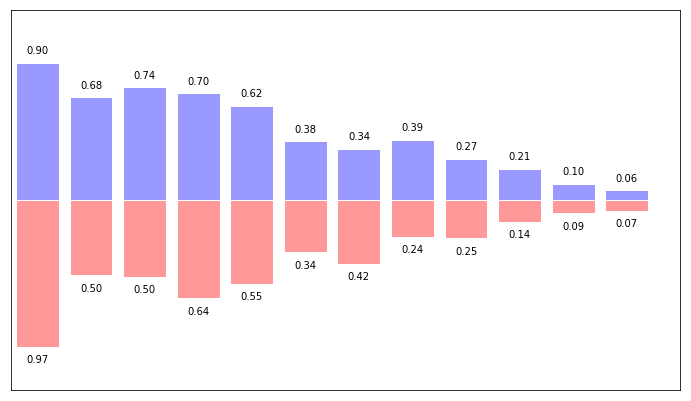

In [21]:
# bar

n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.figure(figsize=(12, 7))

plt.bar(X, +Y1)
plt.bar(X, -Y2)

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, y + 0.05, '%.2f' % y, ha='center', va='bottom')

for x, y in zip(X, Y2):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, - y - 0.05, '%.2f' % y, ha='center', va='top')

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


([], <a list of 0 Text yticklabel objects>)

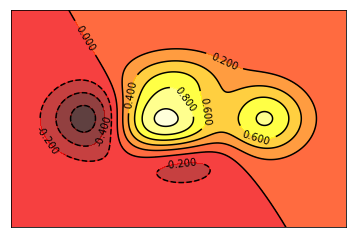

In [25]:
# countour

def f(x,y):
    # the height function
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

# use plt.contourf to filling contours
# X, Y and value for (X,Y) point
plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)

# use plt.contour to add contour lines
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)

plt.clabel(C, inline=True, fontsize=10)
plt.xticks(())
plt.yticks(())

(-2, 2)

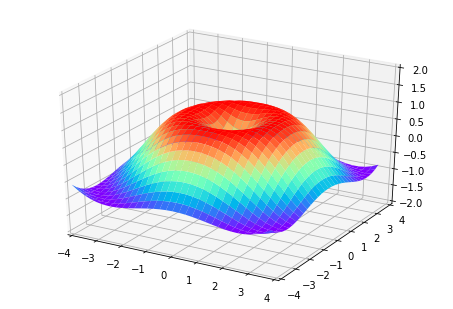

In [48]:
# 3D image

fig = plt.figure()
ax = Axes3D(fig)

# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)

# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.set_zlim3d(-2, 2)

Text(0,0.5,'Y2 data')

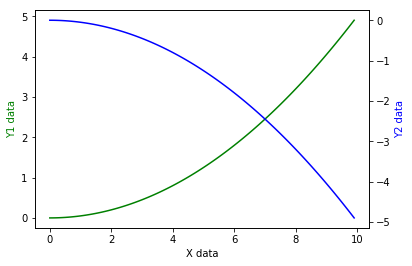

In [49]:
# secondary axis

x = np.arange(0, 10, 0.1)

y1 = 0.05 * x**2

y2 = -1 * y1

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')   # green, solid line
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')

ax2.plot(x, y2, 'b-') # blue
ax2.set_ylabel('Y2 data', color='b')